<a href="https://colab.research.google.com/github/NHagar/cc-genealogy/blob/main/cc_collection_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Dataset List

In [1]:
!pip install datasets

In [2]:
data_list = [
    'nhagar/CC_MAIN_2017_47_urls',
    'nhagar/CC_MAIN_2024_18_urls',
    'nhagar/CC-MAIN-2021-17_urls',
    'nhagar/CC-MAIN-2016-40_urls',
    'nhagar/CC-MAIN-2017-13_urls',
    'nhagar/CC-MAIN-2017-17_urls',
    'nhagar/CC-MAIN-2017-34_urls',
    'nhagar/CC-MAIN-2017-43_urls',
    'nhagar/CC-MAIN-2018-51_urls',
    'nhagar/CC-MAIN-2019-39_urls',
    'nhagar/CC-MAIN-2020-05_urls',
    'nhagar/CC-MAIN-2020-34_urls',
    'nhagar/CC-MAIN-2021-31_urls',
    'nhagar/CC-MAIN-2022-40_urls',
    'nhagar/CC-MAIN-2023-06_urls',
    'nhagar/CC-MAIN-2016-18_urls',
    'nhagar/CC-MAIN-2014-15_urls',
    'nhagar/CC-MAIN-2015-32_urls',
    'nhagar/CC-MAIN-2013-48_urls',
    'nhagar/CC-MAIN-2014-10_urls',
    'nhagar/CC-MAIN-2014-23_urls',
    'nhagar/CC-MAIN-2014-35_urls',
    'nhagar/CC-MAIN-2014-41_urls',
    'nhagar/CC-MAIN-2014-42_urls',
    'nhagar/CC-MAIN-2014-49_urls',
    'nhagar/CC-MAIN-2014-52_urls',
    'nhagar/CC-MAIN-2015-06_urls',
    'nhagar/CC-MAIN-2015-11_urls',
    'nhagar/CC-MAIN-2015-14_urls',
    'nhagar/CC-MAIN-2015-18_urls',
    'nhagar/CC-MAIN-2015-35_urls',
    'nhagar/CC-MAIN-2015-22_urls',
    'nhagar/CC-MAIN-2015-27_urls',
    'nhagar/CC-MAIN-2015-40_urls',
    'nhagar/CC-MAIN-2015-48_urls',
    'nhagar/CC-MAIN-2016-07_urls',
    'nhagar/CC-MAIN-2016-30_urls',
    'nhagar/CC-MAIN-2016-22_urls',
    'nhagar/CC-MAIN-2016-26_urls',
    'nhagar/CC-MAIN-2016-36_urls',
    'nhagar/CC-MAIN-2016-44_urls',
    'nhagar/CC-MAIN-2016-50_urls',
    'nhagar/CC-MAIN-2017-04_urls',
    'nhagar/CC-MAIN-2017-09_urls',
    'nhagar/CC-MAIN-2017-22_urls',
    'nhagar/CC-MAIN-2017-51_urls',
    'nhagar/CC-MAIN-2018-05_urls',
    'nhagar/CC-MAIN-2017-26_urls',
    'nhagar/CC-MAIN-2018-09_urls',
    'nhagar/CC-MAIN-2018-17_urls',
    'nhagar/CC-MAIN-2018-22_urls',
    'nhagar/CC-MAIN-2018-26_urls',
    'nhagar/CC-MAIN-2018-30_urls',
    'nhagar/CC-MAIN-2018-34_urls',
    'nhagar/CC-MAIN-2018-39_urls',
    'nhagar/CC-MAIN-2018-43_urls',
    'nhagar/CC-MAIN-2018-47_urls',
    'nhagar/CC-MAIN-2019-04_urls',
    'nhagar/CC-MAIN-2019-09_urls',
    'nhagar/CC-MAIN-2018-13_urls',
    'nhagar/CC-MAIN-2019-18_urls',
    'nhagar/CC-MAIN-2019-22_urls',
    'nhagar/CC-MAIN-2019-13_urls',
    'nhagar/CC-MAIN-2019-30_urls',
    'nhagar/CC-MAIN-2019-35_urls',
    'nhagar/CC-MAIN-2019-43_urls',
    'nhagar/CC-MAIN-2019-26_urls',
    'nhagar/CC-MAIN-2019-51_urls',
    'nhagar/CC-MAIN-2019-47_urls',
    'nhagar/CC-MAIN-2020-16_urls',
    'nhagar/CC-MAIN-2020-24_urls',
    'nhagar/CC-MAIN-2020-10_urls',
    'nhagar/CC-MAIN-2020-40_urls',
    'nhagar/CC-MAIN-2020-50_urls',
    'nhagar/CC-MAIN-2020-29_urls',
    'nhagar/CC-MAIN-2021-10_urls',
    'nhagar/CC-MAIN-2021-25_urls',
    'nhagar/CC-MAIN-2021-43_urls',
    'nhagar/CC-MAIN-2021-49_urls',
    'nhagar/CC-MAIN-2017-30_urls',
    'nhagar/CC-MAIN-2022-21_urls',
    'nhagar/CC-MAIN-2022-27_urls',
    'nhagar/CC-MAIN-2021-04_urls',
    'nhagar/CC-MAIN-2022-05_urls',
    'nhagar/CC-MAIN-2023-23_urls',
    'nhagar/CC-MAIN-2023-40_urls',
    'nhagar/CC-MAIN-2023-50_urls',
    'nhagar/CC-MAIN-2024-10_urls',
    'nhagar/CC-MAIN-2023-14_urls',
    'nhagar/CC-MAIN-2013-20_urls',
    'nhagar/CC-MAIN-2021-39_urls',
    'nhagar/CC-MAIN-2022-33_urls',
    'nhagar/CC-MAIN-2022-49_urls',
    'nhagar/CC-MAIN-2017-39_urls',
    'nhagar/CC-MAIN-2021-21_urls',
    'nhagar/CC-MAIN-2020-45_urls'
]

In [3]:
from collections import defaultdict
from datasets import load_dataset
import pandas as pd
from tqdm import tqdm  # for progress bar

# Combine

In [4]:
batch_size = 1000000

def combine_datasets(dataset_list):
    # Initialize a defaultdict to store our running totals
    url_counts = defaultdict(int)

    # Process each dataset
    for dataset_name in tqdm(dataset_list, desc="Processing datasets"):
        try:
            ds = load_dataset(dataset_name, split="train")

            # Progress bar for batches within each dataset
            n_batches = (len(ds) + batch_size - 1) // batch_size  # Calculate total number of batches
            batch_pbar = tqdm(total=n_batches, desc=f"Processing {dataset_name}", leave=False)

            for i in range(0, len(ds), batch_size):
                batch = ds.select(range(i, min(i + batch_size, len(ds))))

                # Process rows with a progress bar
                for row in batch:
                    url_counts[row['url_host_name']] += row['url_count']

                batch_pbar.update(1)

            batch_pbar.close()
        except Exception as e:
            print(f"Error processing {dataset_name}: {str(e)}")
            continue

    # Convert final results to DataFrame
    results_df = pd.DataFrame([
        {'url_host_name': host, 'total_count': count}
        for host, count in url_counts.items()
    ])

    # Sort by total count in descending order
    results_df = results_df.sort_values('total_count', ascending=False)

    return results_df

# Test with just a few datasets first
test_datasets = data_list[:2]  # Using the first two datasets from your earlier list
results = combine_datasets(test_datasets)

# Display the top 20 domains
print("\nTop 20 domains by total URL count:")
print(results.head(20))

# Save results
results.to_csv('combined_url_counts.csv', index=False)

Processing datasets:   0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(

Processing datasets:   0%|          | 0/2 [00:26<?, ?it/s]


KeyboardInterrupt: 

# Gini

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def create_gini_curve(df, title_string="URL Distribution"):
    # Sort values in ascending order
    sorted_df = df.sort_values('url_count', ascending=True)

    # Calculate cumulative values
    n = len(sorted_df)
    index = np.arange(1, n + 1)

    # Calculate cumulative shares
    url_sum = sorted_df['url_count'].sum()
    lorenz_points = sorted_df['url_count'].cumsum() / url_sum

    # Add starting point (0,0)
    lorenz_points = np.insert(lorenz_points, 0, 0)
    population_points = np.linspace(0, 1, n + 1)

    # Calculate Gini coefficient using area method
    A = 0.5  # Area of the triangle representing perfect equality
    B = np.trapz(lorenz_points, population_points)  # Area under Lorenz curve
    gini = (A - B) / A

    # Create visualization
    plt.figure(figsize=(10, 10))

    # Plot perfect equality line
    plt.plot([0, 1], [0, 1], 'r--', label='Perfect Equality')

    # Plot Lorenz curve
    plt.plot(population_points, lorenz_points, label='Lorenz Curve')

    plt.title(f'Lorenz Curve for {title_string}\nGini Coefficient: {gini:.3f}')
    plt.xlabel('Cumulative Proportion of Domains')
    plt.ylabel('Cumulative Proportion of URLs')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.gca().set_aspect('equal')

    return plt

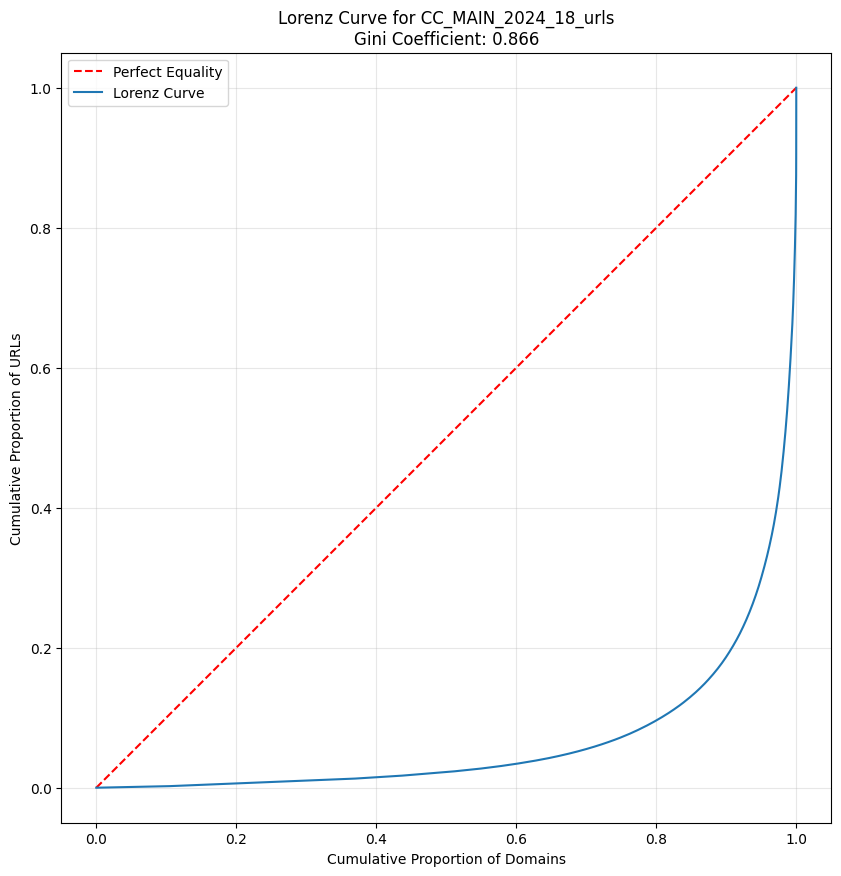

In [23]:
ds = load_dataset("nhagar/CC_MAIN_2024_18_urls")
df_to_plot = ds['train'].shuffle(seed=42).select(range(10000)).to_pandas()

# Create and show the plot
plot = create_gini_curve(df_to_plot,title_string="CC_MAIN_2024_18_urls")
plot.show()

In [17]:
df_to_plot.sample(10)

,crawl,url_host_name,url_count
807,CC-MAIN-2024-18,academianovoreial.com,2
5231,CC-MAIN-2024-18,www.themagicgingerbreadhouse.com,2
3352,CC-MAIN-2024-18,playboycosmetics.com,1
8508,CC-MAIN-2024-18,whatdoesmean.com,2
4276,CC-MAIN-2024-18,667die.com,17
1244,CC-MAIN-2024-18,ryanfoxpainting.myshopify.com,3
5566,CC-MAIN-2024-18,nghethuattinhque.com,2
4255,CC-MAIN-2024-18,jheiler.net,2
5389,CC-MAIN-2024-18,augustininsuresme.com,10
3706,CC-MAIN-2024-18,tasclearing.in,6


In [24]:
len(data_list)

96